# **Project: Feature Selection and Model Tuning on Concrete Strength Dataset**

# **Context:**

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

These ingredients include cement, blast furnace slag, fly ash,
water, superplasticizer, coarse aggregate, and fine aggregate.

# **Objective:**

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain 85% to 95% accuracy.

# **Data Description:**

This data set has 1030 rows and 9 columns.
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients
The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).

- Cement: Cement (component 1) -- Kilogram in a meter-cube mixture -- Input Variable [DataType: Quantitative]
- Blast Furnace Slag: Blast Furnace Slag (component 2) -- kg in a m3 mixture -- Input Variable [DataType: Quantitative]
- Fly Ash: Fly Ash (component 3) -- kg in a m3 mixture -- Input Variable [DataType: Quantitative]
- Water: Water (component 4) -- kg in a m3 mixture -- Input Variable [DataType: Quantitative]
- Superplasticizer: Superplasticizer (component 5) -- kg in a m3 mixture -- Input Variable [DataType: Quantitative]
- Coarse Aggregate: Coarse Aggregate (component 6) -- kg in a m3 mixture -- Input Variable [DataType: Quantitative]
- Fine Aggregate: Fine Aggregate (component 7) -- kg in a m3 mixture -- Input Variable [DataType: Quantitative]
- Age: Age-Day(1-365) -- Input Variable [DataType: Quantitative]
- Concrete compressive strength: Concrete compressive strength -- MegaPascals -- Output Variable [DataType: Quantitative]

# **Let's Start Coding!**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('concrete.csv')

In [3]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Inference:

- One thing we observed is that there is highly varying magnitudes or values or units. e.g. The values in cement column are a 3 digit number and superplastic is one or 2 digit number.
- If feature scaling is not done, then our machine learning algorithm will tend to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values. 

In [4]:
# Checking the validity of the data

data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### Inference:

- Slag, ash and superplastic have minimum values as zero. These values can be zero in the composition of cement, so the zero value are valid here.
- The minimum value of the age is 1. We can see that from the data description, the age is also valid as it ranges from 1 day to 365 days.

In [5]:
data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### Inference:

- There are no null values here. So, no need to worry about observations that were not recorded and data corruption.
- Handling missing data is important as many machine learning algorithms do not support data with missing values.

In [6]:
# Checking for duplicate rows of data and drop if there is any.
data.duplicated(subset=None, keep='first').sum()

25

- There are 25 duplicate rows.

In [7]:
# Drop the duplicates.
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()     # We can see that, now the duplicate rows are zero.

0

In [9]:
# Check the skewness of the data.
data.skew()

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

- Age is highly skewed.

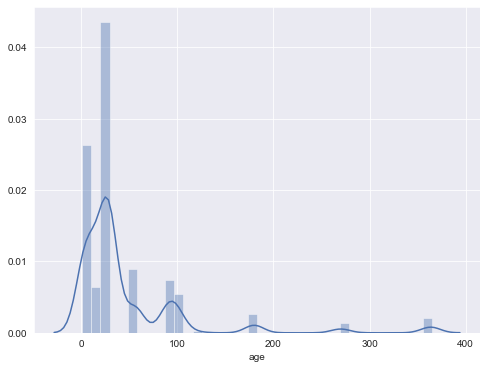

In [11]:
# To see skewness of age
sns.set({'figure.figsize': (8,6)})
sns.distplot(data['age'], kde=True);

C:\Users\layas\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


OverflowError: cannot convert float infinity to integer

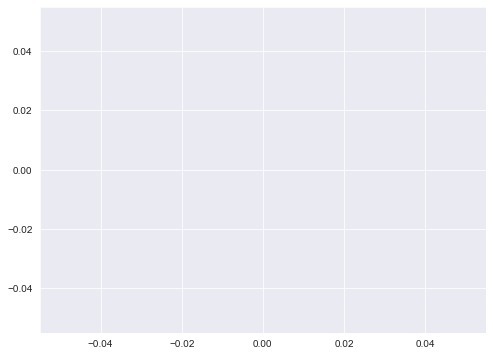

In [14]:
sns.distplot(np.log(data['age']), kde=True)

In [15]:
data['age'] = np.log(data['age'])

C:\Users\layas\anaconda3\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\layas\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


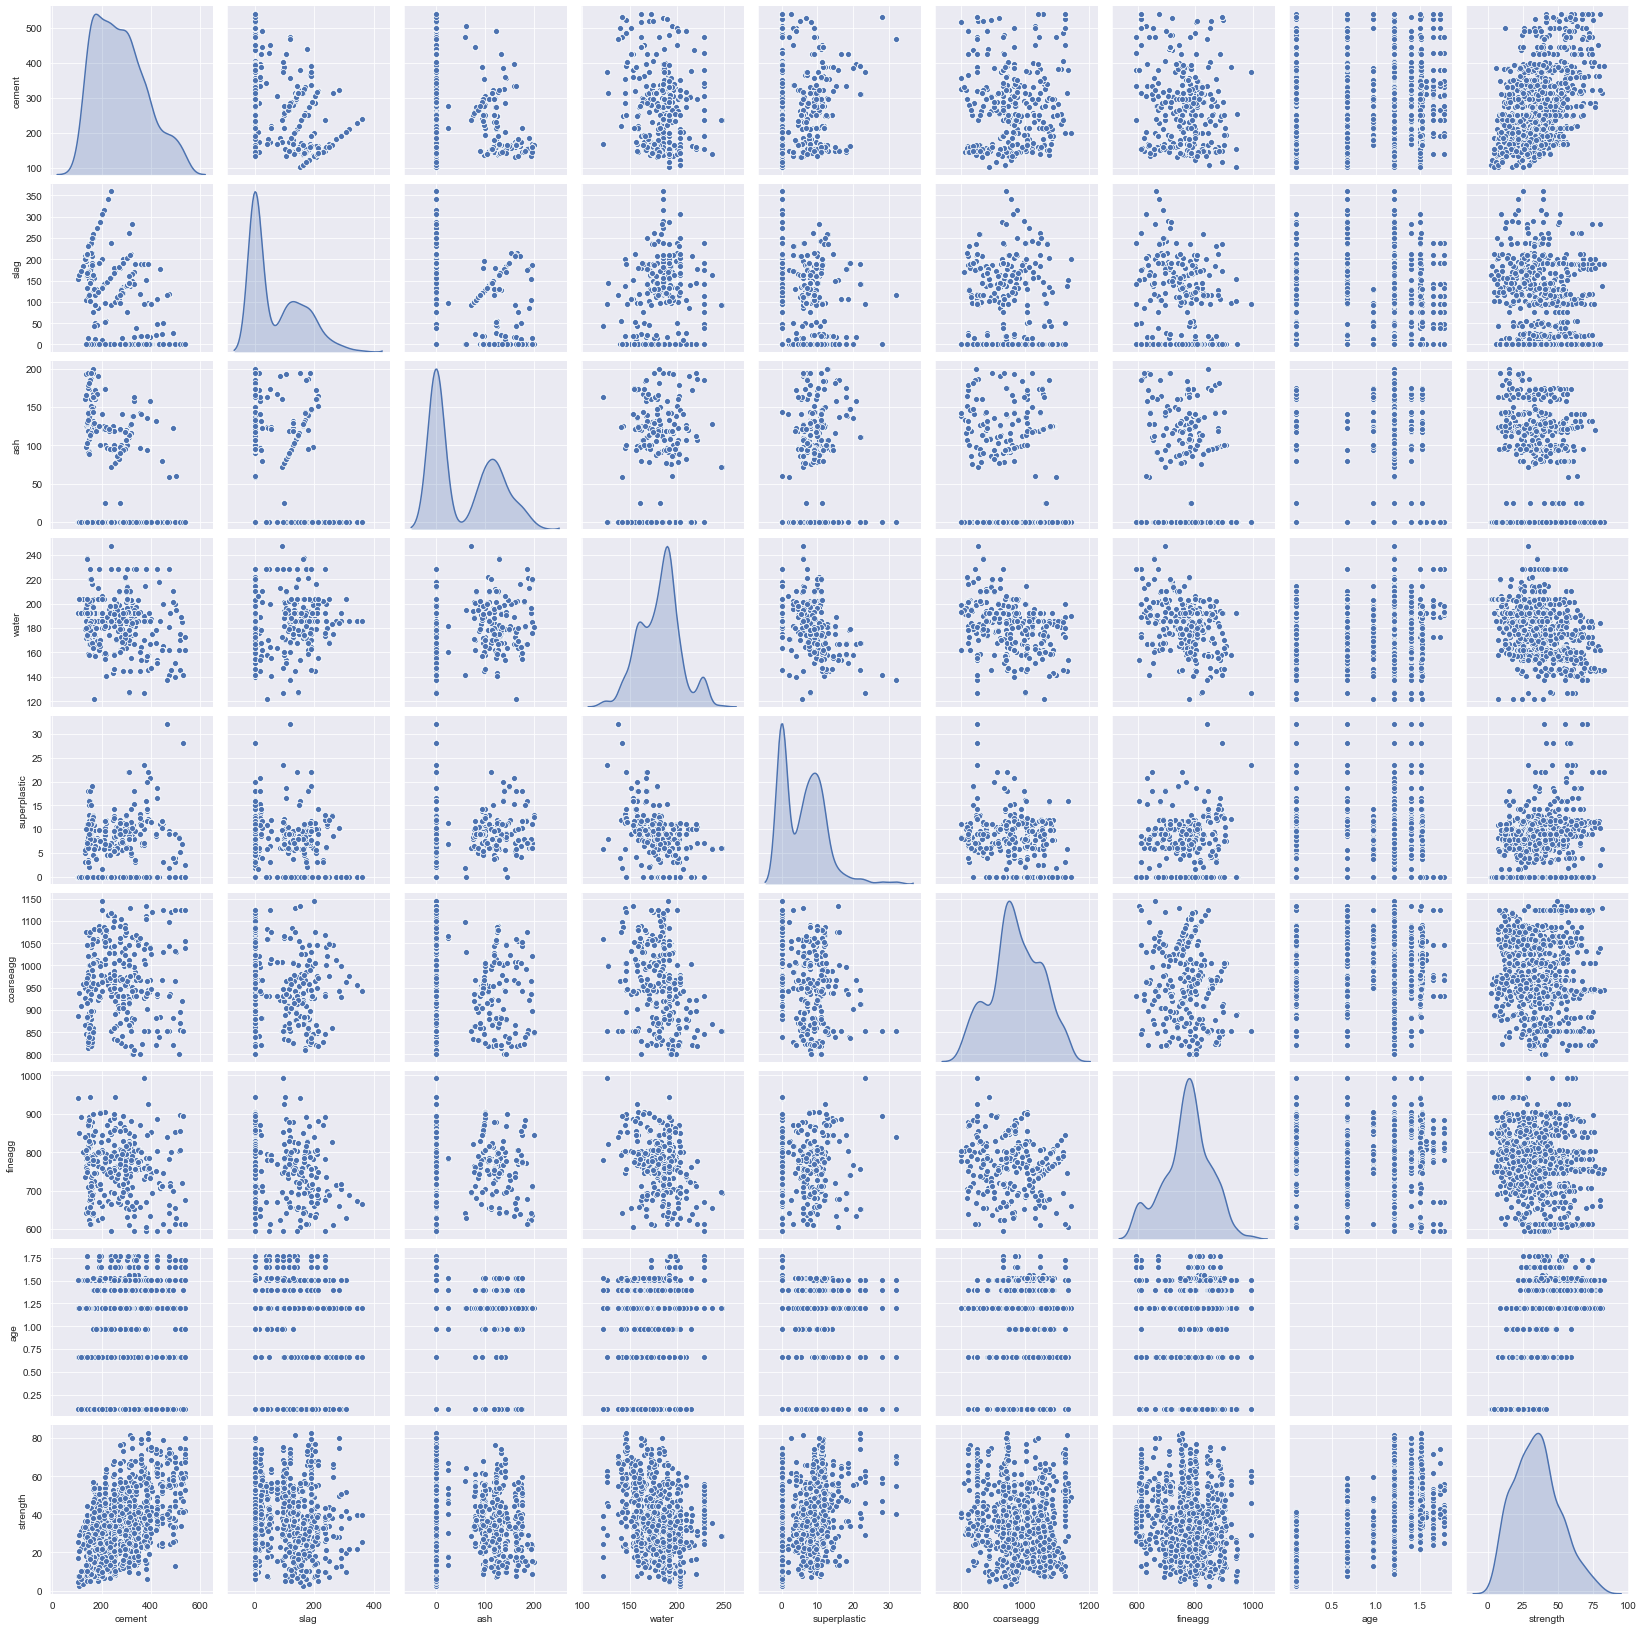

In [16]:
# Pairplot using seaborn
sns.pairplot(data, diag_kind='kde');

### Insights:

- As age is increasing strength is increasing
- Cement and strength have a linear relationship

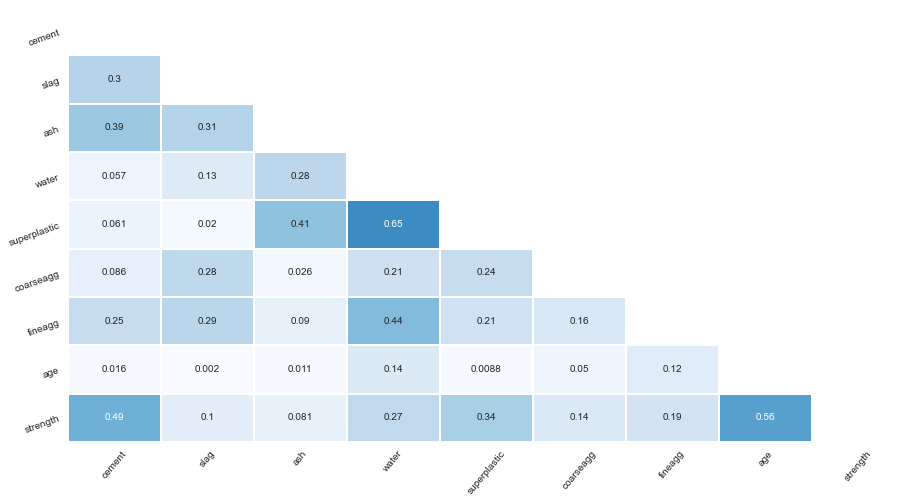

In [17]:
corr = abs(data.corr())                   # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0              # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))            # setting the figure size
sns.set_style(style = 'white')          # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)               # Aesthetic purposes
plt.yticks(rotation = 20)               # Aesthetic purposes
plt.show()

In [18]:
data['water:cement'] = data['water']/data['cement']  # Extracting a new column

In [19]:
data['coarseagg:fineagg'] = data['coarseagg'] / data['fineagg'] # Extracting a new column

In [20]:
data = data[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'water:cement', 'coarseagg:fineagg', 'strength']] # rearranging columns

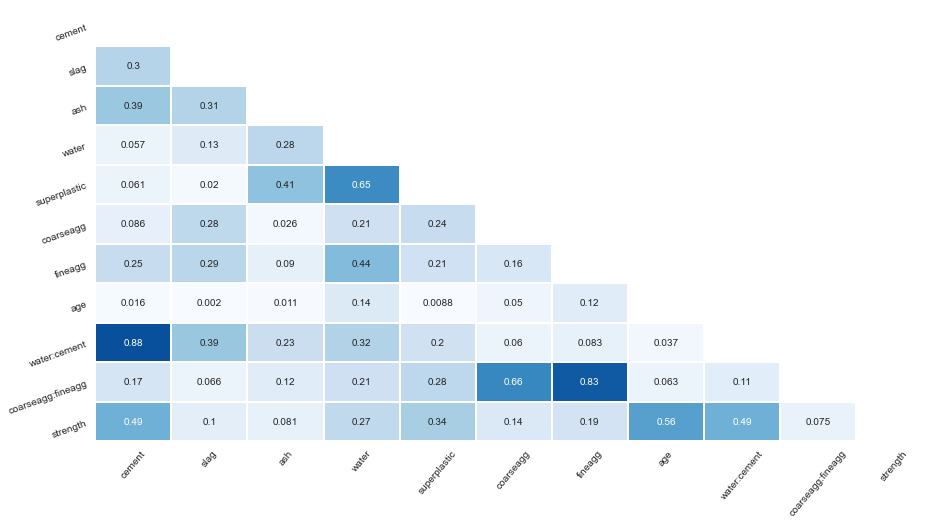

In [21]:
corr = abs(data.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

In [22]:
data = data.drop(['cement','water','coarseagg:fineagg'],axis=1)

# As we already taken the info related to 'water' and 'cement' in 'water:cement' feature, therefore dropping 'water' and 'cement'
# 'coarseagg:fineagg' was not a feature because both columns individually provide more info

In [23]:
data.head()

,slag,ash,superplastic,coarseagg,fineagg,age,water:cement,strength
0,212.0,0.0,0.0,971.8,748.5,1.203634,1.440198,29.89
1,42.2,124.3,10.8,1080.8,796.2,0.970422,0.937241,23.51
2,0.0,95.7,5.5,956.9,861.2,1.203634,0.749600,29.22
3,114.0,0.0,0.0,932.0,670.0,1.203634,0.857143,45.85
4,183.4,0.0,9.1,1047.4,696.7,1.203634,1.248708,18.29


In [24]:
# Separating dependent and independent variables
X = data.drop('strength',axis=1)
y = data['strength']

In [25]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=7)

In [26]:
#Degree 1
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=7)

model.fit(X_train, y_train)

print(model.score(X_train, y_train))

print(model.score(X_test, y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
#Degree 2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=2, interaction_only=True)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(X_train, y_train)

print(pipeline.score(X_train, y_train))

print(pipeline.score(X_test, y_test))

In [ ]:
#Degree 3

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3, interaction_only=True)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(X_train, y_train)

print(pipeline.score(X_train, y_train))

print(pipeline.score(X_test, y_test))

### Insights:

- As it is visible that highest testing score is in degree one so going fprward with degree 1

# Model:

1. Different Models:

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
k = KFold(random_state=7, n_splits=5, shuffle=True)

# KFold will split the data in 5 equal parts

In [ ]:
algo= []
cv_r2_mean = []
cv_r2_std = []
cv_rmse_mean = []

# Blanks list to store model name, cross validated r2 score (mean and standard deviation) and RMSE

In [ ]:
# Linear Regression
## Since the dataset is small theefore using compete dataset for cv
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])

pipeline.fit(X_train, y_train)


algo.append('Linear Regression')
cv_r2_mean.append(cross_val_score(pipeline, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

### Note: When we use mean squared error as scoring in cross val score it gives output with a negative sign. So we use Negative sign to make it positive.

In [ ]:
# Decision Tree

model = DecisionTreeRegressor(random_state=7)

model.fit(X_train, y_train)


algo.append('Decision Tree')
cv_r2_mean.append(cross_val_score(model, x, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=7)

model.fit(X_train, y_train)


algo.append('Random Forest')
cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# Bagging
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(random_state=7)

model.fit(X_train, y_train)


algo.append('Bagging')
cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=7)

model.fit(X_train, y_train)


algo.append('AdaBoost')
cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=7)

model.fit(X_train, y_train)

algo.append('Gradient Boosting')
cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['CV R2 score mean'] = cv_r2_mean
results['CV R2 score std'] = cv_r2_std
results['CV RMSE'] = cv_rmse_mean
results = results.set_index('Model')
results

### Insights:

- Gradient Boosting is the best algorithm here
- Bagging and Random Forest are almost same, second best algorithms

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=7)

params = {
    'bootstrap': [True, False],
    'max_depth': [3, 4, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 3, 4],
    'min_samples_split': [2, 3, 5],
    'n_estimators': [4, 25, 50]
}    

grid = GridSearchCV(estimator=rf, param_grid=params, cv=k)

grid.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
model = ['Random forest after Grid search']
tr = [grid.score(X_train, y_train)]
te = [grid.score(X_test, y_test)]
rmse = [mean_squared_error(y_test, grid.predict(X_test))**0.5]

### Random Search on Gradient Boosting

In [ ]:
gb = GradientBoostingRegressor(random_state=7)
gb.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=150, num=25)]   # returns evenly spaced 25 numbers
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num=5)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
learning_rate = [float(x) for x in np.linspace(0.1, 1, num=10)]

# Create the random grid
params_r = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'learning_rate': learning_rate}

# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator=gb, param_distributions=params_r, cv=k, random_state=7)

# Fit the random search model
random.fit(X_train, y_train)

In [ ]:
random.best_params_

In [ ]:
model.append('Gradient Boosting after RandomCV')
tr.append(random.score(X_train, y_train))
te.append(random.score(X_test, y_test))
rmse.append(mean_squared_error(y_test, random.predict(X_test))**0.5)

In [ ]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = model
results['Training Score'] = tr
results['Testing Score'] = te
results['RMSE'] = rmse
results = results.set_index('Model')
results

Gradient Boosting gives better results after hyperparameter tuning as well

Hence our final model was able to explain 93.08 % variance was explained by the model from all the independent variables with RMSE score of 4.2 Mpa in concrete strength

Our final model is slightly overfit but the testing score is high enough so we can use this model for now or we can try to reduce noise by changing parameters